In [2]:
import urllib.request, urllib.parse, urllib.error
import numpy as np
import pandas as pd
pd.options.display.max_columns=50

#import PyQt5
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import sys

from numpy.random import seed
seed(888)
import os

from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error 
from catboost import CatBoostRegressor,Pool
import lightgbm as lgb

from scipy import stats
from scipy.cluster.vq import vq, kmeans, whiten

# !pip install wget
import wget

# !pip install missingno
import missingno as msno

# !pip install umap-learn
# !pip install hdbscan


# !pip install pandas_profiling


# !/usr/bin/python3 -m pip install --upgrade pip


import holidays
%matplotlib inline

In [2]:
# url = 'http://files.bidderstack.com/hackathon.zip'
# filename = wget.download(url)

In [3]:
# filename

In [9]:
# import shutil
# shutil.unpack_archive(filename,'/mnt/terabait/zipzip/')

In [10]:
df = pd.read_csv('/mnt/terabait/zipzip/train.csv')

In [11]:
df

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
0,4,Games,Racing,com.MadOut.BIG,2021-07-05 18:07:40,MSK+6,Забайкальский Край,Чита,android,10.0
1,4,NaN,NaN,com.easybrain.solitaire.klondike.free,2021-07-10 10:38:42,MSK+2,Оренбургская область,Оренбург,Android,10.0.0
2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,2021-08-04 13:34:29,MSK,Санкт-Петербург,Санкт-Петербург,android,9.0
3,5,NaN,NaN,tcouchgind.scooterextreme.scooter,2021-08-06 07:35:27,MSK+2,Свердловская область,Екатеринбург,android,9
4,4,NaN,NaN,com.FidgetTrading3D.game,2021-08-02 20:43:59,MSK,Московская область,Звенигород,android,6.0.1
...,...,...,...,...,...,...,...,...,...,...
44854511,3,Games,Simulation,1068204657,2021-08-07 17:19:23,MSK,Краснодарский край,Краснодар,ios,14.4.2
44854512,3,Games,Puzzle,com.easybrain.nonogram.color,2021-08-02 09:17:16,MSK,Владимирская область,Владимир,android,11.0
44854513,5,Games,Arcade,com.nordcurrent.canteenhd,2021-09-16 09:26:38,MSK,Брянская область,Брянск,android,5.1
44854514,4,NaN,NaN,com.fugo.wow,2021-07-09 18:02:33,MSK,Татарстан,Казань,Android,7.1.2


In [12]:
display(
    df.info(),
    df.columns,
    df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44854516 entries, 0 to 44854515
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Segment          int64 
 1   gamecategory     object
 2   subgamecategory  object
 3   bundle           object
 4   created          object
 5   shift            object
 6   oblast           object
 7   city             object
 8   os               object
 9   osv              object
dtypes: int64(1), object(9)
memory usage: 3.3+ GB


None

Index(['Segment', 'gamecategory', 'subgamecategory', 'bundle', 'created',
       'shift', 'oblast', 'city', 'os', 'osv'],
      dtype='object')

Segment                   0
gamecategory       16961331
subgamecategory    16968425
bundle                17284
created                   0
shift               3591150
oblast              3455278
city                4799992
os                      233
osv                     283
dtype: int64

In [13]:
df_train = df.sample(500000)
df_train

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10
...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4


<AxesSubplot:>

<AxesSubplot:>

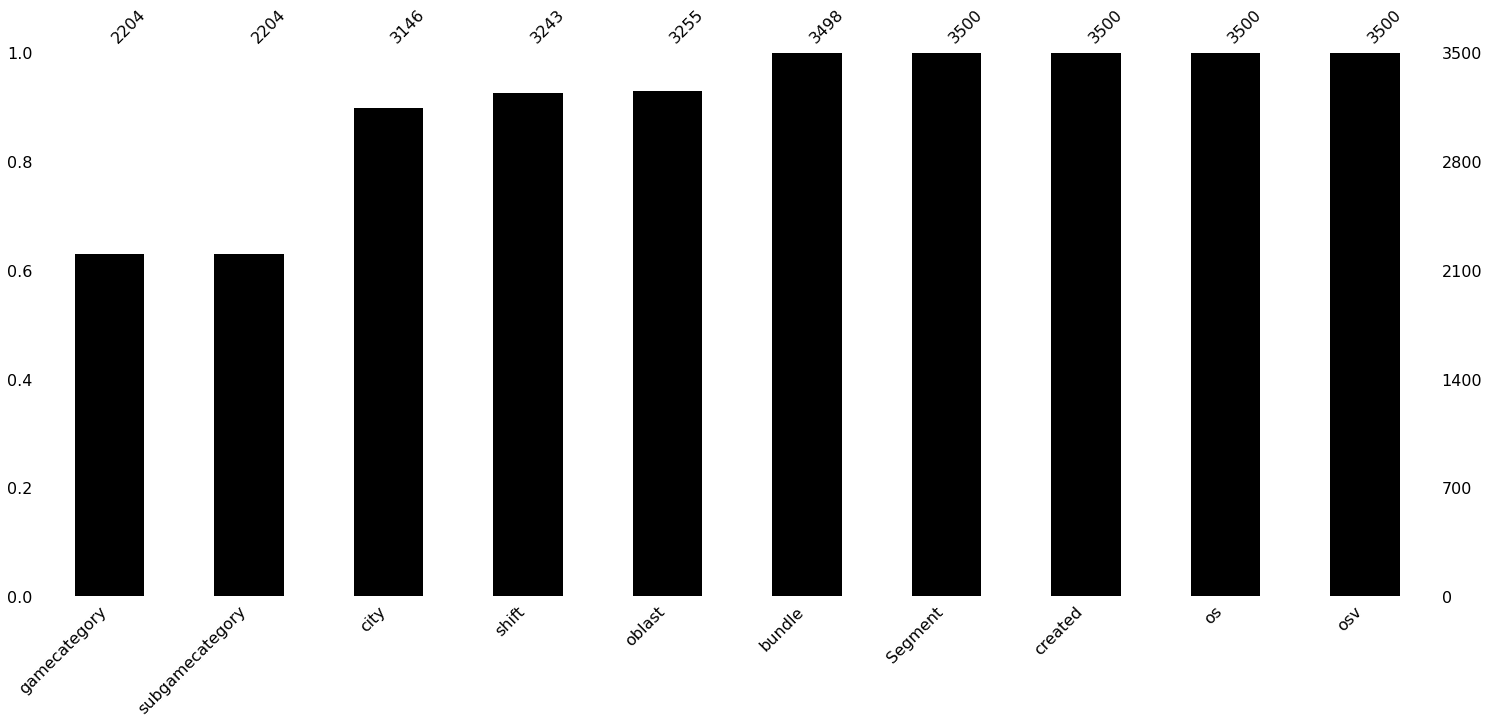

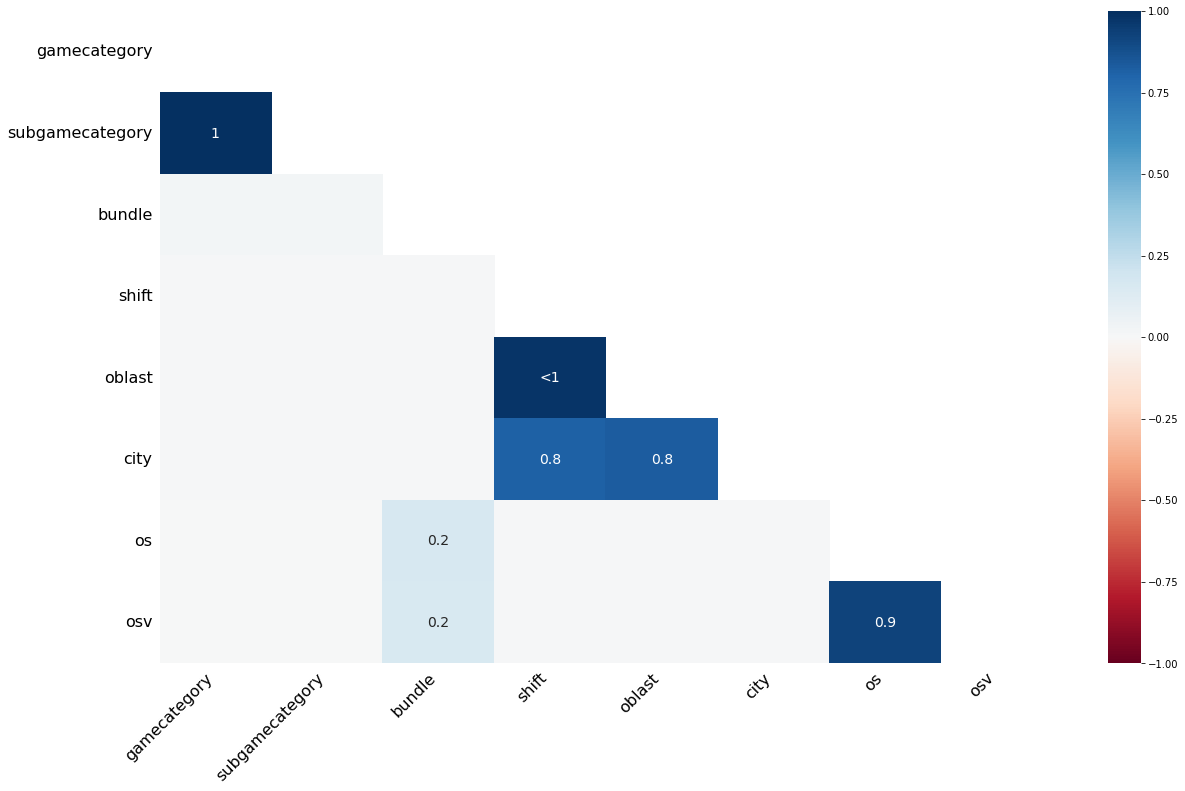

In [14]:
display(msno.bar(df_train.sample(3500),
                        color='black', 
                        sort = 'ascending',
                       ),
       msno.heatmap(df_train))

In [15]:
#  0   Segment          int64 
#  1   gamecategory     object
#  2   subgamecategory  object
#  3   bundle           object
#  4   created          object
#  5   shift            object
#  6   oblast           object
#  7   city             object
#  8   os               object
#  9   osv              object

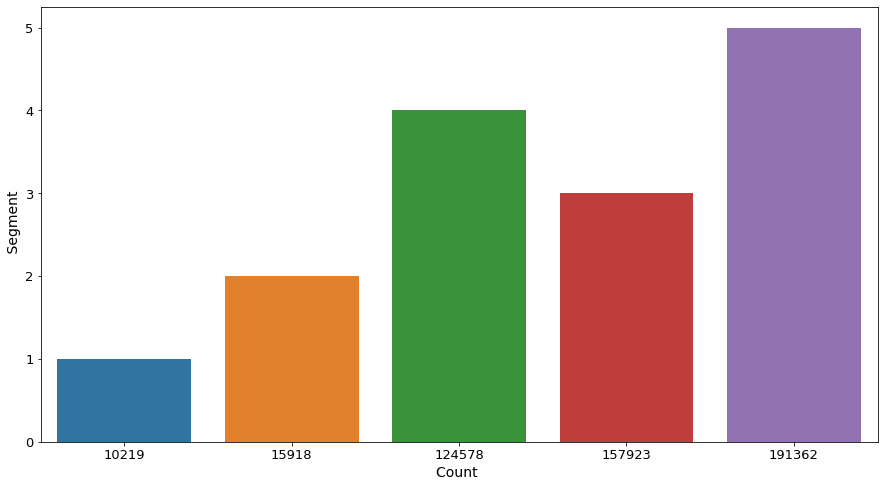

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_train['Segment'].value_counts().reset_index(),
        y='index',x='Segment')
plt.xticks(fontsize=13)
plt.xlabel("Count ",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel(" Segment",fontsize=14)
plt.show()

In [17]:
len(df_train.loc[(df_train['Segment']==5)].values)

191362

In [18]:
display(df_train.loc[(df_train['os']=='ios')].tail(20))

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
19101038,5,Games,Board,1061530248,2021-09-16 05:58:07,MSK+3,Новосибирская область,Новосибирск,ios,13.7
25017212,3,Games,Puzzle,1195621598,2021-07-10 14:52:18,MSK,Санкт-Петербург,Санкт-Петербург,ios,14.6
21183258,5,Games,Casual,1579282271,2021-09-20 06:54:59,MSK+4,Кемеровская область,Кемерово,ios,14.8
22820024,5,NaN,NaN,1447924266,2021-09-17 21:04:09,MSK,Татарстан,Казань,ios,12.1.0
35799913,3,Games,Casual,1455860184,2021-08-02 12:26:31,MSK,Санкт-Петербург,Санкт-Петербург,ios,14.6
38245682,5,Games,Puzzle,1369521645,2021-09-16 22:09:18,MSK,Москва,Москва,ios,14.7.1
28842521,5,Lifestyle,None,351331194,2021-08-03 14:14:52,MSK,Татарстан,Казань,ios,14.6
24802697,3,Games,Action,949701151,2021-08-02 09:48:27,MSK,Москва,Москва,ios,14.6
32045113,5,Games,Casual,1469878258,2021-09-19 10:02:38,MSK,Москва,Москва,ios,14.7.1
24200897,3,Games,Puzzle,1473024868,2021-07-09 15:15:19,MSK,Краснодарский край,Ленинградская,ios,14.6


In [103]:
df_train_shift = df_train.loc[(df_train['Segment']==5)]['shift']

NameError: name 'df_train' is not defined

In [20]:
df_train['created'].unique()

array(['2021-08-03 11:32:39', '2021-08-05 13:28:34',
       '2021-08-02 03:58:52', ..., '2021-09-19 17:28:05',
       '2021-07-09 22:41:00', '2021-09-18 12:12:11'], dtype=object)

In [21]:
set(df_train_shift)

{'MSK',
 'MSK+1',
 'MSK+2',
 'MSK+3',
 'MSK+4',
 'MSK+5',
 'MSK+6',
 'MSK+7',
 'MSK+8',
 'MSK+9',
 'MSK-1',
 nan}

In [22]:
from pandas_profiling import ProfileReport
profile_final = ProfileReport(df_train, explorative=True, minimal=False)
profile_final.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
df_train.columns

Index(['Segment', 'gamecategory', 'subgamecategory', 'bundle', 'created',
       'shift', 'oblast', 'city', 'os', 'osv'],
      dtype='object')

In [24]:
df_train_2 = df_train.copy(deep=True)


In [25]:
display(df_train_2.isna().sum(),
        df_train_2.info(),
       df_train_2.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 37978306 to 11908568
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Segment          500000 non-null  int64 
 1   gamecategory     311189 non-null  object
 2   subgamecategory  311105 non-null  object
 3   bundle           499796 non-null  object
 4   created          500000 non-null  object
 5   shift            460237 non-null  object
 6   oblast           461751 non-null  object
 7   city             446690 non-null  object
 8   os               499994 non-null  object
 9   osv              499993 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


Segment                 0
gamecategory       188811
subgamecategory    188895
bundle                204
created                 0
shift               39763
oblast              38249
city                53310
os                      6
osv                     7
dtype: int64

None

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4
11908568,5,Games,Action,com.miniclip.bowmasters,2021-09-18 12:12:11,MSK,Москва,Москва,android,11.0


In [26]:
display(df_train_2['created'].max(),
        df_train_2['created'].min()
       )

df_train_2.loc[(df_train_2['created']<'2021-01-10')]

'2021-09-20 23:56:04'

'1970-01-01 03:00:00'

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
4333824,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
39017435,3,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2946205,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
24522728,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
33961367,3,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
17633917,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN


In [27]:
df_train_2 = df_train_2.loc[~(df_train_2['created']<='2021-01-01')]
df_train_2

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10
...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4


In [28]:

#
#ALERT
df_train_2['created'] = df_train_2['created'].fillna(method='ffill')
#ALERT
#

df_train_2['created'] = pd.to_datetime(df_train_2['created'], format = '%Y-%m-%d %H:%M:%S')
df_train_2['year'] = df_train_2['created'].dt.year
df_train_2['month'] = df_train_2['created'].dt.month
df_train_2['day'] = df_train_2['created'].dt.day
df_train_2['hour'] = df_train_2['created'].dt.hour
df_train_2['minute'] = df_train_2['created'].dt.minute


df_train_2

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,year,month,day,hour,minute
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0,2021,8,3,11,32
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2,2021,8,5,13,28
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0,2021,8,2,3,58
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0,2021,8,4,14,6
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10,2021,8,6,8,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9,2021,8,3,12,18
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3,2021,7,6,23,33
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0,2021,9,19,17,28
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4,2021,7,9,22,41


In [29]:
df_train_2[['created_sm','to_drop']] = df_train['created'].str.split(' ',expand=True)
df_train_2 = df_train_2.drop(columns = 'to_drop')
df_train_2['created_sm'] = pd.to_datetime(df_train_2['created_sm'])
df_train_2

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,year,month,day,hour,minute,created_sm
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0,2021,8,3,11,32,2021-08-03
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2,2021,8,5,13,28,2021-08-05
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0,2021,8,2,3,58,2021-08-02
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0,2021,8,4,14,6,2021-08-04
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10,2021,8,6,8,47,2021-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9,2021,8,3,12,18,2021-08-03
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3,2021,7,6,23,33,2021-07-06
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0,2021,9,19,17,28,2021-09-19
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4,2021,7,9,22,41,2021-07-09


In [30]:
NON_WORK_DAY_DICT = {
    2021: {
        1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 23, 24, 30, 31],
        2: [6, 7, 13, 14, 21, 22, 23, 27, 28],
        3: [6, 7, 8, 13, 14, 20, 21, 27, 28],
        4: [3, 4, 10, 11, 17, 18, 24, 25],
        5: [1, 2, 3, 8, 9, 10, 15, 16, 22, 23, 29, 30],
        6: [5, 6, 12, 13, 14, 19, 20, 26, 27],
        7: [3, 4, 10, 11, 17, 18, 24, 25, 31],
        8: [1, 7, 8, 14, 15, 21, 22, 28, 29],
        9: [4, 5, 11, 12, 18, 19, 25, 26],
        10: [2, 3, 9, 10, 16, 17, 23, 24, 30, 31],
        11: [4, 5, 6, 7, 13, 14, 20, 21, 27, 28],
        12: [4, 5, 11, 12, 18, 19, 25, 26, 31]
    },
    2022: {
        1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 22, 23, 29, 30],
        2: [5, 6, 12, 13, 19, 20, 23, 26, 27],
        3: [6, 7, 8, 12, 13, 19, 20, 26, 27],
        4: [2, 3, 9, 10, 16, 17, 23, 24, 30],
        5: [1, 2, 3, 7, 8, 9, 10, 14, 15, 21, 22, 28, 29],
        6: [4, 5, 11, 12, 13, 18, 19, 25, 26],
        7: [2, 3, 9, 10, 16, 17, 23, 24, 30, 31],
        8: [6, 7, 13, 14, 20, 21, 27, 28],
        9: [3, 4, 10, 11, 17, 18, 24, 25],
        10: [1, 2, 8, 9, 15, 16, 22, 23, 29, 30],
        11: [4, 5, 6, 12, 13, 19, 20, 26, 27],
        12: [3, 4, 10, 11, 17, 18, 24, 25, 31]
    }
}


In [31]:
df_train_2['is_working'] = 0

for i in df_train_2.index:
    if not df_train_2['day'].loc[i] in NON_WORK_DAY_DICT[df_train_2['year'].loc[i]][df_train_2['month'].loc[i]]:
        df_train_2['is_working'].loc[i] = 1

df_train_2

/home/zodiac180/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,year,month,day,hour,minute,created_sm,is_working
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0,2021,8,3,11,32,2021-08-03,1
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2,2021,8,5,13,28,2021-08-05,1
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0,2021,8,2,3,58,2021-08-02,1
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0,2021,8,4,14,6,2021-08-04,1
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10,2021,8,6,8,47,2021-08-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9,2021,8,3,12,18,2021-08-03,1
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3,2021,7,6,23,33,2021-07-06,1
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0,2021,9,19,17,28,2021-09-19,0
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4,2021,7,9,22,41,2021-07-09,1


In [32]:
import ephem,datetime

sun = ephem.Sun()
moon = ephem.Moon()
raleigh = ephem.Observer()
#raleigh.lon, raleigh.lat = "86.10426", "55.4467" #kem


raleigh.lon, raleigh.lat = "134.973", "48.4649" #хабар


raleigh.horizon = '-0:34'  # USNO standard atmospheric diffraction
raleigh.pressure = 0       # atmospheric refraction parameters

def riseset_sun(date, f):
    raleigh.date = date
    sun.compute(raleigh)
    sr = ephem.localtime(f(sun))    
    return sr

def riseset_moon(date, f):
    raleigh.date = date
    moon.compute(raleigh)
    sr = ephem.localtime(f(moon))    
    return sr



def sunframe(df):
    #Солнце
    df['sunrise'] = df['created_sm'].map(lambda d: riseset_sun(d, raleigh.next_rising)) #+ np.timedelta64(7, 'h')
    df['sunset'] = df['created_sm'].map(lambda d: riseset_sun(d, raleigh.next_setting)) #+ np.timedelta64(7, 'h')
    
    df['sunrise_h']=df['sunrise'].dt.hour
    df['sunrise_m']=df['sunrise'].dt.minute/60
    
    df['sunset_h']=df['sunset'].dt.hour      
    df['sunset_m']=df['sunset'].dt.minute/60

    
    df['Dsun']=(df['sunset_h'] + df['sunset_m'])-(df['sunrise_h'] + df['sunrise_m'])
    df['sunrise']=df['sunset_h'] + df['sunset_m']
    df['sunset'] =df['sunrise_h'] + df['sunrise_m']
    

    #луна 5-10% к точности
    df['sunrise_moon'] = df['created_sm'].map(lambda d: riseset_moon(d, raleigh.next_rising)) #+ np.timedelta64(7, 'h')
    df['sunset_moon'] = df['created_sm'].map(lambda d: riseset_moon(d, raleigh.next_setting)) #+ np.timedelta64(7, 'h')

    df['sunrise_moon_h']=df['sunrise_moon'].dt.hour
    df['sunrise_moon_m']=df['sunrise_moon'].dt.minute/60
    
    df['sunset_moon_h']=df['sunset_moon'].dt.hour      
    df['sunset_moon_m']=df['sunset_moon'].dt.minute/60
    
    df['sunrise_moon']=df['sunrise_moon_h']+df['sunrise_moon_m']
    df['sunset_moon']=df['sunset_moon_h']+df['sunset_moon_m']
    
    df['Dmoon']=df['sunset_moon']-df['sunrise_moon']
    
    
    
    return df



In [33]:
df_train_2 = sunframe(df_train_2)
df_train_2

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,year,month,day,hour,minute,created_sm,is_working,sunrise,sunset,sunrise_h,sunrise_m,sunset_h,sunset_m,Dsun,sunrise_moon,sunset_moon,sunrise_moon_h,sunrise_moon_m,sunset_moon_h,sunset_moon_m,Dmoon
37978306,5,Games,Action,com.wb.goog.mkx,2021-08-03 11:32:39,MSK,Адыгея,Майкоп,android,9.0,2021,8,3,11,32,2021-08-03,1,17.566667,2.633333,2,0.633333,17,0.566667,14.933333,22.166667,13.616667,22,0.166667,13,0.616667,-8.550000
24371832,3,Lifestyle,None,351331194,2021-08-05 13:28:34,MSK,Нижегородская область,Нижний Новгород,ios,14.2,2021,8,5,13,28,2021-08-05,1,17.516667,2.683333,2,0.683333,17,0.516667,14.833333,23.566667,15.650000,23,0.566667,15,0.650000,-7.916667
21965793,5,Games,Strategy,com.fridaysgames.godsandglory,2021-08-02 03:58:52,MSK,Ставрополье,Ставрополь,android,10.0,2021,8,2,3,58,2021-08-02,1,17.600000,2.616667,2,0.616667,17,0.600000,14.983333,21.666667,12.516667,21,0.666667,12,0.516667,-9.150000
27204553,5,Games,Simulation,com.yourstoryinteractive.sails.pirate.adventure,2021-08-04 14:06:34,MSK,Нижегородская область,Нижний Новгород,android,10.0,2021,8,4,14,6,2021-08-04,1,17.550000,2.650000,2,0.650000,17,0.550000,14.900000,22.783333,14.683333,22,0.783333,14,0.683333,-8.100000
32182158,5,NaN,NaN,com.alightcreative.motion,2021-08-06 08:47:59,MSK+2,Башкортостан,Уфа,android,10,2021,8,6,8,47,2021-08-06,1,17.500000,2.700000,2,0.700000,17,0.500000,14.800000,0.533333,16.500000,0,0.533333,16,0.500000,15.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770144,4,NaN,NaN,com.PGE.CatSimEvo,2021-08-03 12:18:49,MSK,Краснодарский край,NaN,Android,9,2021,8,3,12,18,2021-08-03,1,17.566667,2.633333,2,0.633333,17,0.566667,14.933333,22.166667,13.616667,22,0.166667,13,0.616667,-8.550000
17116131,3,Games,Puzzle,1369521645,2021-07-06 23:33:06,MSK,Ставрополье,Ставрополь,ios,13.2.3,2021,7,6,23,33,2021-07-06,1,18.050000,2.100000,2,0.100000,18,0.050000,15.950000,23.650000,14.733333,23,0.650000,14,0.733333,-8.916667
19404932,3,NaN,NaN,com.CrownEnvision.MegaRampStunts,2021-09-19 17:28:05,MSK,Москва,Москва,android,10.0,2021,9,19,17,28,2021-09-19,0,16.066667,3.716667,3,0.716667,16,0.066667,12.350000,15.866667,2.233333,15,0.866667,2,0.233333,-13.633333
20185070,3,Games,Casual,1508334081,2021-07-09 22:41:00,MSK,Ростовская область,Ростов-на-Дону,ios,10.3.4,2021,7,9,22,41,2021-07-09,1,18.016667,2.150000,2,0.150000,18,0.016667,15.866667,1.716667,17.783333,1,0.716667,17,0.783333,16.066667


In [34]:
# df_train_2['Dsun'].plot(figsize=(10,15))

In [36]:
# ??????????????????? я курить наконец

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,len(df_train_2.columns)):
    
    df_train_2[(df_train_2.columns[i])] = le.fit_transform(df_train_2[[(df_train_2.columns[i])]].astype(str))
#может, apply???
#tqdm contrib???????########

/home/zodiac180/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
df_train_2

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,year,month,day,hour,minute,created_sm,is_working,sunrise,sunset,sunrise_h,sunrise_m,sunset_h,sunset_m,Dsun,sunrise_moon,sunset_moon,sunrise_moon_h,sunrise_moon_m,sunset_moon_h,sunset_moon_m,Dmoon
37978306,4,5,0,15203,148854,0,1,962,1,167,0,1,9,3,26,8,1,11,8,0,8,1,14,11,14,2,8,0,2,9,5
24371832,2,10,31,2941,210141,0,48,1125,3,102,0,1,11,5,21,10,1,9,10,0,11,1,12,9,17,5,9,7,4,10,3
21965793,4,5,42,8255,103699,0,68,1603,1,2,0,1,7,17,54,7,1,12,7,0,7,1,15,12,13,1,7,10,1,7,7
27204553,4,5,39,15543,188454,0,48,1125,1,2,0,1,10,6,56,9,1,10,9,0,9,1,13,10,15,3,8,13,3,11,4
32182158,4,22,50,5308,222396,2,7,1807,1,0,0,1,12,22,42,11,1,8,11,0,12,1,11,8,1,7,0,6,5,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3770144,3,22,50,4697,150949,0,34,0,0,166,0,1,9,4,10,8,1,11,8,0,8,1,14,11,14,2,8,0,2,9,5
17116131,2,5,35,767,32830,0,68,1603,3,82,0,0,12,16,27,1,1,16,1,0,1,2,3,18,18,4,9,9,3,13,6
19404932,2,22,50,4086,372184,0,44,1048,1,2,0,2,6,9,21,18,0,1,18,1,13,0,4,1,9,14,4,16,9,2,1
20185070,2,5,11,1783,73939,0,58,1448,3,16,0,0,15,15,36,4,1,14,4,0,4,2,1,15,4,11,1,11,6,15,16


In [105]:
499994 * 31

15499814

In [41]:
# df_train_2.to_pickle('/mnt/terabait/zipzip/train.pkl')

In [3]:
df_train_2 = pd.read_pickle('/mnt/terabait/zipzip/train.pkl')

## HDBSCAN

In [38]:
%%time
import umap

umap_embeddings = umap.UMAP(n_neighbors=20, 
                            n_components=5, 
                         metric='cosine').fit_transform(df_train_2[0:100000].drop(columns=['created']).values)

CPU times: user 6min 5s, sys: 23.8 s, total: 6min 29s
Wall time: 51.8 s


In [39]:
%%time
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=100,
                          metric='euclidean',                      
               cluster_selection_method='eom').fit(umap_embeddings)


CPU times: user 1.07 s, sys: 107 ms, total: 1.18 s
Wall time: 1.88 s


CPU times: user 6min 2s, sys: 24.3 s, total: 6min 27s
Wall time: 51.7 s


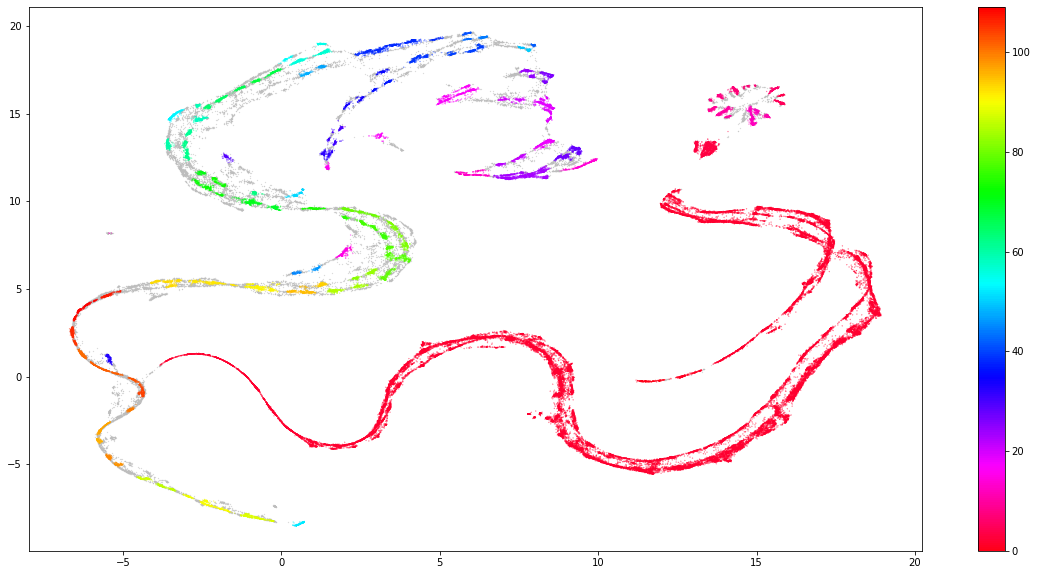

In [40]:
%%time
# Подготовка данных
umap_data = umap.UMAP(n_neighbors=20, n_components=2, min_dist=0.0, metric='cosine').fit_transform(df_train_2[0:100000].drop(columns=['created']).values)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Визуализация кластеров
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [86]:
len(result['labels'].unique())

111

<AxesSubplot:xlabel='hour'>

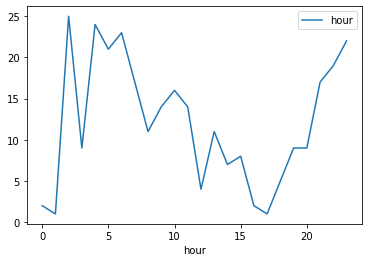

In [104]:
# df_train_4 = df_train_2[0:100000].copy(deep=True)
# df_train_4['cluster'] = result['labels'].values
# df_train_4.tail(20)

# df_train_4.groupby(['cluster'],as_index=False)['city'].count()
df_check = df_train_4.loc[(df_train_4['cluster']==0)]
# df_check['hour']
df_check = df_check.groupby(['hour'])['hour'].count().to_frame()
df_check.plot()
# for i in result['labels'].unique():
#     display((len(df_train_4.loc[(df_train_4['cluster']==i)])))

## k-means

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

data = df_train_2.copy()
frame = data.drop(columns=['Segment'])
frame['target'] = data.Segment

components = list(data.drop(columns=['Segment']).columns)
train_X, test_X, train_y, test_y = train_test_split(frame[components], frame.target, test_size=0.5, shuffle=True, random_state=0)

In [50]:
xgb = XGBRegressor(random_state=0).fit(train_X, train_y)
print("%.4f" % r2_score(test_y, xgb.predict(test_X).reshape(-1, 1)))

[22:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3625


In [58]:
from sklearn.neural_network import MLPRegressor

In [59]:
scaler_x = MinMaxScaler((0, 1)).fit(train_X)
scaled_train_x = scaler_x.transform(train_X)
scaled_test_x = scaler_x.transform(test_X)

scaler_y = MinMaxScaler((0, 1)).fit(train_y.values.reshape(-1, 1))
scaled_train_y = scaler_y.transform(train_y.values.reshape(-1, 1)).ravel()

mlp = MLPRegressor([180] * 4, activation='relu', random_state=0).fit(scaled_train_x, scaled_train_y)
print("%.4f" % r2_score(test_y, scaler_y.inverse_transform(mlp.predict(scaled_test_x).reshape(-1, 1))))

0.3809


In [60]:
clusters = KMeans(2).fit(train_X)
centers_train = np.array([
    clusters.cluster_centers_[label] for label in clusters.labels_
])
centers_test = np.array([
    clusters.cluster_centers_[label] for label in clusters.predict(test_X)
])
for index, column in enumerate(centers_train.T):
    train_X[
        str(index)] = [
        np.linalg.norm(column[iterator] - train_X[components[index]].values[iterator]) for iterator in range(len(column))
                      ]

for index, column in enumerate(centers_test.T):
    test_X[str(index)] = [
        np.linalg.norm(column[iterator] - test_X[components[index]].values[iterator]) for iterator in range(len(column))
    ]

scaler_x = MinMaxScaler((0, 1)).fit(train_X)
scaled_train_x = scaler_x.transform(train_X)
scaled_test_x = scaler_x.transform(test_X)

scaler_y = MinMaxScaler((0, 1)).fit(train_y.values.reshape(-1, 1))
scaled_train_y = scaler_y.transform(train_y.values.reshape(-1, 1)).ravel()

mlp = MLPRegressor([180] * 4, activation='relu', random_state=0).fit(scaled_train_x, scaled_train_y)
print("%.4f" % r2_score(test_y, scaler_y.inverse_transform(mlp.predict(scaled_test_x).reshape(-1, 1))))

0.3913


## Catboost

In [167]:
X = df_train_2.drop('Segment', axis=1).values
y = df_train_2['Segment'].values

# display(X.head(),y.head())

In [114]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [168]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [176]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1, 
    loss_function='MultiClassOneVsAll'
)


clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'loss_function': 'MultiClassOneVsAll', 'learning_rate': 0.1, 'iterations': 5}


In [199]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    learning_rate=0.5,
#     custom_loss=['AUC', 'Accuracy'],
#     loss_function='MultiClassOneVsAll',
    task_type = 'GPU'
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [157]:
cat_f = [] 
for col in X.columns:
    if X[col].dtype == np.uint8:
        cat_f.append(col)


In [158]:
%%time
model = CatBoostClassifier()
model.fit(X_train, y_train, verbose=0, cat_features=cat_f)

CPU times: user 9min 19s, sys: 5.42 s, total: 9min 25s
Wall time: 1min 20s


In [200]:
validate(model, val_data)

ROC AUC = 0.9092462051501965


In [160]:
u

In [126]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, f1_score

In [194]:
def validate(model, val_data):
    y = model.predict_proba(val_data[0])
#     print('Accuracy =', accuracy_score(y, val_data[1]))
    print('ROC AUC =', roc_auc_score(val_data[1], y, multi_class='ovr'))
#     print('F1 =', f1_score(y, val_data[1]))

In [195]:
validate(model, val_data)

ROC AUC = 0.9059077455152353


In [136]:
from sklearn.linear_model import LogisticRegression

In [181]:
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
preds = clf.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, preds, multi_class='ovr')
print(roc_auc) 

0.7543168879635891


In [151]:
preds

array([[0.00978412, 0.00234045, 0.2208859 , 0.30649986, 0.46048967],
       [0.05671573, 0.00516141, 0.49299429, 0.37099716, 0.07413141],
       [0.00644071, 0.00445631, 0.23528385, 0.31200744, 0.44181169],
       ...,
       [0.00645577, 0.13628315, 0.22363754, 0.09320048, 0.54042304],
       [0.10826622, 0.00576648, 0.47323774, 0.40112307, 0.0116065 ],
       [0.00902951, 0.00079392, 0.2693189 , 0.26301883, 0.45783884]])

In [146]:
cat_preds = model.predict(X_val)

In [153]:
cat_preds

array([[3.],
       [2.],
       [3.],
       ...,
       [2.],
       [2.],
       [4.]])

In [154]:
y_val.values

99999

In [173]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(y)
y_k_hot = mlb.transform(y)

ovr = OneVsRestClassifier(estimator=CatBoostClassifier(iterations=10,random_state=1))
ovr.fit(X,y_k_hot)

ovr.predict(X)*mlb.classes_

TypeError: 'numpy.int64' object is not iterable

In [172]:
y


array([4, 2, 4, ..., 2, 2, 4])